# 1. 정방향 사진 sticker 적용 

Coordinate of Bounding box : rectangles[[(118, 180) (304, 366)]] 

coordinate of nose :  (217, 274)
refined (x,y) : (124,181)


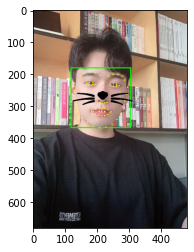

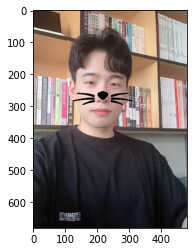

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_me.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 480 x 680 의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip-동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    

#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
#print (img_sticker.shape)


#sticker가 시작하는 지점 x,y
# 스티커의 모양도 정사각형이므로 dlib_rect과 크기를 같게 해주면 된다. 
#따라서 rect의 왼쪽 상단을 스티커의 시작점으로 잡고 오른쪽 하단을 끝점으로 잡는다. 

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
'''
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

'''




#sticker이미지에 대해 선택적으로 적용(rgb가 0인 부분 사용 x) 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()



#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()




# 2. 회전 적용  

Coordinate of Bounding box : rectangles[[(118, 263) (304, 449)]] 

coordinate of nose :  (206, 363)
각도는 28.495638618244982
(187, 187, 3)
refined (x,y) : (113,270)


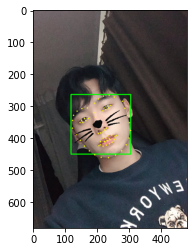

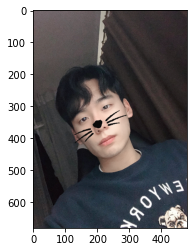

In [163]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib 
from math import *#삼각함수를 이용하기 때문에 math lib를 가져온다. 


#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_mee.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 480 x 680 의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x_eye_l=landmark[37][0] # 코를 중심으로 스티커를 만들지만 회전각을 이용하는 두 점은 눈 위쪽 중앙 landmark를 이용하여
    y_eye_l=landmark[37][1] # 구하기 때문에 두점의 x, y좌표 변수 저장
    x_eye_r=landmark[43][0]
    y_eye_r=landmark[43][1]
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    
#find angle 
wid=abs(x_eye_l-x_eye_r) # 삼각함수(tan)를 이용하기 위해 두 점의 x와 y의 차를 구한다. 
hei=abs(y_eye_l-y_eye_r)
if y_eye_l >=y_eye_r: # y_eye_l(오른쪽 눈 좌표의 y값)이 y_eye_l(왼쪽 눈 좌표의 y값) 보다 크다면 고개가 왼쪽으로 회전한 것이기 
    ang=np.arctan(hei/wid) # 때문에 이럴 경우 주어진 각도를 +값으로 저장한다. (회전 방향이 반시계 방향이기 떄문)
    ang=degrees(ang)
else:
    ang=np.arctan(hei/wid) # 위와는 반대의 경우로 오른쪽 눈 좌표의 y값이 더 크다면 고개가 오른쪽으로 회전한 것이기 때문에  
    ang=-degrees(ang) # 이 경우에는 주어진 각도를 -값으로 저장한다. 

print("각도는",ang)




#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

whisker_c=10 # 배경처리에 문제가 있었기 때문에 이미지의 검정부분( 코와 수염부분이며 rgb로는 0,0,0)을 다른 rgb값으로 바꾸어준다.
             # ex ) (10,10,10)   

img_sticker=np.where(img_sticker==0 ,whisker_c,img_sticker).astype(np.uint8)  # where을 사용해 바꿈



#rotation of sticker
height_s,width_s,channel_s=img_sticker.shape #회전을 위해 필요한 값을 따로 저장 
matrix_s=cv2.getRotationMatrix2D((width_s/2,height_s/2),ang,1)#cv의 함수를 이용하여 회전행렬 생성((회전 중심좌표),각도, 비율)
img_sticker=cv2.warpAffine(img_sticker,matrix_s,(width_s,height_s))# 회전행렬과 이미지를 연산하여 sticker회전 



#sticker가 시작하는 지점 x,y
# 스티커의 모양도 정사각형이므로 dlib_rect과 크기를 같게 해주면 된다. 
#따라서 rect의 왼쪽 상단을 스티커의 시작점으로 잡고 오른쪽 하단을 끝점으로 잡는다. 

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
if refined_y<0:
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    






#sticker이미지에 대해 선택적으로 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c ,sticker_area,img_sticker).astype(np.uint8)
# 이미지에 표현해야 하는 부분은 이전에 (10,10,10)으로 바꾸어 주었기 때문에 이를 제외한 부분은 모두 sticker_area로 표현되게 한다. 
# 이 방법으로 sticker의 기본 배경과 회전했을 경우 나타난는 검정 여백을 한번에 처리할 수 있다. 

#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()




 # 3. 반대 회전 

Coordinate of Bounding box : rectangles[[(52, 260) (319, 528)]] 

coordinate of nose :  (191, 406)
각도는 -27.01266534793854
(268, 268, 3)
refined (x,y) : (57,272)


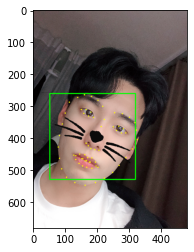

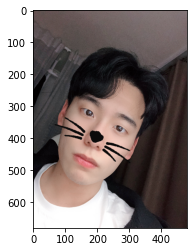

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib 
from math import *#삼각함수를 이용하기 때문에 math lib를 가져온다. 


#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_right.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 480 x 680 의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x_eye_l=landmark[37][0] # 코를 중심으로 스티커를 만들지만 회전각을 이용하는 두 점은 눈 위쪽 중앙 landmark를 이용하여
    y_eye_l=landmark[37][1] # 구하기 때문에 두점의 x, y좌표 변수 저장
    x_eye_r=landmark[43][0]
    y_eye_r=landmark[43][1]
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    
#find angle 
wid=abs(x_eye_l-x_eye_r) # 삼각함수(tan)를 이용하기 위해 두 점의 x와 y의 차를 구한다. 
hei=abs(y_eye_l-y_eye_r)
if y_eye_l >=y_eye_r: # y_eye_l(오른쪽 눈 좌표의 y값)이 y_eye_l(왼쪽 눈 좌표의 y값) 보다 크다면 고개가 왼쪽으로 회전한 것이기 
    ang=np.arctan(hei/wid) # 때문에 이럴 경우 주어진 각도를 +값으로 저장한다. (회전 방향이 반시계 방향이기 떄문)
    ang=degrees(ang)
else:
    ang=np.arctan(hei/wid) # 위와는 반대의 경우로 오른쪽 눈 좌표의 y값이 더 크다면 고개가 오른쪽으로 회전한 것이기 때문에  
    ang=-degrees(ang) # 이 경우에는 주어진 각도를 -값으로 저장한다. 

print("각도는",ang)




#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

whisker_c=10 # 배경처리에 문제가 있었기 때문에 이미지의 검정부분( 코와 수염부분이며 rgb로는 0,0,0)을 다른 rgb값으로 바꾸어준다.
             # ex ) (10,10,10)   

img_sticker=np.where(img_sticker==0 ,whisker_c,img_sticker).astype(np.uint8)  # where을 사용해 바꿈



#rotation of sticker
height_s,width_s,channel_s=img_sticker.shape #회전을 위해 필요한 값을 따로 저장 
matrix_s=cv2.getRotationMatrix2D((width_s/2,height_s/2),ang,1)#cv의 함수를 이용하여 회전행렬 생성((회전 중심좌표),각도, 비율)
img_sticker=cv2.warpAffine(img_sticker,matrix_s,(width_s,height_s))# 회전행렬과 이미지를 연산하여 sticker회전 



#sticker가 시작하는 지점 x,y
# 스티커의 모양도 정사각형이므로 dlib_rect과 크기를 같게 해주면 된다. 
#따라서 rect의 왼쪽 상단을 스티커의 시작점으로 잡고 오른쪽 하단을 끝점으로 잡는다. 

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
if refined_y<0:
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    






#sticker이미지에 대해 선택적으로 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c ,sticker_area,img_sticker).astype(np.uint8)
# 이미지에 표현해야 하는 부분은 이전에 (10,10,10)으로 바꾸어 주었기 때문에 이를 제외한 부분은 모두 sticker_area로 표현되게 한다. 
# 이 방법으로 sticker의 기본 배경과 회전했을 경우 나타난는 검정 여백을 한번에 처리할 수 있다. 

#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=whisker_c,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()




# 4. 누워서 찍은 사진( 90도 회전) 

Coordinate of Bounding box : rectangles[] 



NameError: name 'w' is not defined

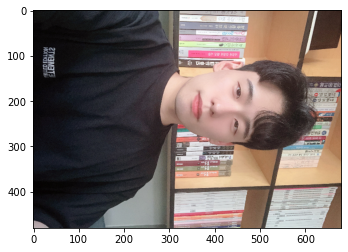

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

#이미지 불러오기 @
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_me.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 480 x 680 의 크기로 Resize
img_bgr = cv2.rotate(img_bgr, cv2.ROTATE_90_CLOCKWISE)# 90도 시계방향 회전
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


#Landmarks on RGB Image    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    

#import sticker
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
#print (img_sticker.shape)


#sticker가 시작하는 지점 x,y
# x는 코가 sticker의 중심에 와야함 - 
#y는 left

#coordinate of sticker
refined_x = x-w//2   # left
refined_y = y-h//2     # top
print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


#refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
'''
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

'''




#sticker이미지에 대해 선택적으로 적용(rgb가 0인 부분 사용 x) 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#result
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()



#final result
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()




# 5. 여러명 인식 

Coordinate of Bounding box : rectangles[[(322, 253) (476, 408)], [(97, 98) (283, 284)], [(139, 282) (268, 411)]] 

coordinate of nose :  (388, 328)
각도는 -4.343239951689387
(155, 155, 3)
refined (x,y) : (311,251)
coordinate of nose :  (188, 198)
각도는 -33.5110187978408
(187, 187, 3)
refined (x,y) : (95,105)
coordinate of nose :  (207, 332)
각도는 -13.535856369134246
(130, 130, 3)
refined (x,y) : (142,267)


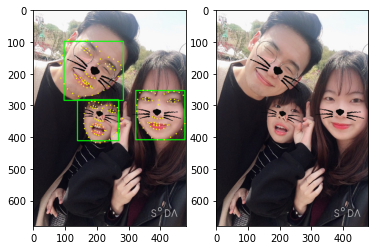

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib 
from math import *#삼각함수를 이용하기 때문에 math lib를 가져온다. 


#이미지 불러오기 
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/family.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480,680))    # 480 x 680 의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
#print("BGR image 출력 : ")#
#plt.imshow(img_bgr)#
#plt.show()#



#bgr->rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print("RGB image 출력 : ")#
#plt.imshow(img_rgb)#
#plt.show()#




#- detector 선언
detector_hog = dlib.get_frontal_face_detector()   





#face_bounding box coordinate
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("Coordinate of Bounding box :",dlib_rects,"\n")




#print Bounding box on RGB Image 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
#plt.imshow(img_show_rgb)
#print("Bounding Box on RGB :")#
#plt.show()#


#import Landmark Model - bz2
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#make list of points about landmarks 
list_landmarks = []
i=0
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


    
    
    

    
    

#Landmarks on RGB Image    
for landmark in list_landmarks:
    
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    #plt.imshow(img_show_rgb)
#print("Landmarks on RGB Image : ")#
#plt.show()#


#dlib_rect을 추적하고 landmark를 찾는 일은 사진의 인식되는 객체 각각이 동시에 진행이 되고,
# 아래부분 부터는 각각의 좌표를 이용하여 각각의 위치에 sticker를 합성해야 하기 때문에 for문을 이용하여 인식된 객체의 갯수만큼 
#반복되도록 한다. 

#find coordinate of nose
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("coordinate of nose : ",landmark[30]) # nose center index : 30
    x_eye_l=landmark[37][0] # 코를 중심으로 스티커를 만들지만 회전각을 이용하는 두 점은 눈 위쪽 중앙 landmark를 이용하여
    y_eye_l=landmark[37][1] # 구하기 때문에 두점의 x, y좌표 변수 저장
    x_eye_r=landmark[43][0]
    y_eye_r=landmark[43][1]
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    #print ('(x,y) : (%d,%d)'%(x,y))
    #print ('(w,h) : (%d,%d)'%(w,h))
    
    
    #find angle 
    wid=abs(x_eye_l-x_eye_r) # 삼각함수(tan)를 이용하기 위해 두 점의 x와 y의 차를 구한다. 
    hei=abs(y_eye_l-y_eye_r)
    if y_eye_l >=y_eye_r: # y_eye_l(오른쪽 눈 좌표의 y값)이 y_eye_l(왼쪽 눈 좌표의 y값) 보다 크다면 고개가 왼쪽으로 회전한 것이기 
        ang=np.arctan(hei/wid) # 때문에 이럴 경우 주어진 각도를 +값으로 저장한다. (회전 방향이 반시계 방향이기 떄문)
        ang=degrees(ang)
    else:
        ang=np.arctan(hei/wid) # 위와는 반대의 경우로 오른쪽 눈 좌표의 y값이 더 크다면 고개가 오른쪽으로 회전한 것이기 때문에  
        ang=-degrees(ang) # 이 경우에는 주어진 각도를 -값으로 저장한다. 

    print("각도는",ang)




    #import sticker
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png'
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    print(img_sticker.shape)

    whisker_c=10 # 배경처리에 문제가 있었기 때문에 이미지의 검정부분( 코와 수염부분이며 rgb로는 0,0,0)을 다른 rgb값으로 바꾸어준다.
                # ex ) (10,10,10)   

    img_sticker=np.where(img_sticker==0 ,whisker_c,img_sticker).astype(np.uint8)  # where을 사용해 바꿈



    #rotation of sticker
    height_s,width_s,channel_s=img_sticker.shape #회전을 위해 필요한 값을 따로 저장 
    matrix_s=cv2.getRotationMatrix2D((width_s/2,height_s/2),ang,1)#cv의 함수를 이용하여 회전행렬 생성((회전 중심좌표),각도, 비율)
    img_sticker=cv2.warpAffine(img_sticker,matrix_s,(width_s,height_s))# 회전행렬과 이미지를 연산하여 sticker회전 



    #sticker가 시작하는 지점 x,y
    # 스티커의 모양도 정사각형이므로 dlib_rect과 크기를 같게 해주면 된다. 
    #따라서 rect의 왼쪽 상단을 스티커의 시작점으로 잡고 오른쪽 하단을 끝점으로 잡는다. 

    #coordinate of sticker
    refined_x = x-w//2   # left
    refined_y = y-h//2     # top
    print ('refined (x,y) : (%d,%d)'%(refined_x, refined_y))


    #refined coordinate of sticker@@@@@@@ 조건문으로 수정 필요 
    if refined_y<0:
        img_sticker = img_sticker[-refined_y:]
        print (img_sticker.shape)
        refined_y = 0
        print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
        


    


    #sticker이미지에 대해 선택적으로 적용
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker!=whisker_c ,sticker_area,img_sticker).astype(np.uint8)
    # 이미지에 표현해야 하는 부분은 이전에 (10,10,10)으로 바꾸어 주었기 때문에 이를 제외한 부분은 모두 sticker_area로 표현되게 한다. 
    # 이 방법으로 sticker의 기본 배경과 회전했을 경우 나타난는 검정 여백을 한번에 처리할 수 있다. 

    #result




    #final result
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker!=whisker_c,sticker_area,img_sticker).astype(np.uint8)

   



fig=plt.figure()#단일 플롯에 다수 이미지 그리기
rows=1# 행 수
cols=2# 열 수 
ax1= fig.add_subplot(rows,cols,1) #첫번째 plot
ax1.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
ax2=fig.add_subplot(rows,cols,2) # 두번째 plot
ax2.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 결과
 ## 1. 정방향 사진 
 불러온 사진에 얼굴을 인식하고 landmark를 찾아 코의 좌표를 얻고, 
 그 좌표를 이용하여 sticker와 image의 왼쪽 상단 모서리를 같게 한다. 
 비교적 간단하게 구현할 수 있었다. 
 
 ## 2. 회전 적용 
  어떠한 방법으로 회전을 시킬지 구상하는 것이 관건이었던 것 같다. 
  어려운 방법은 아니었지만 아이디어가 떠올랐을때 가장먼저 든 생각은 오차문제 였다. 
  첫 시도는 코의 두 점을 이용하여 각도를 측정하는 것이었다. 수직선으로 일정하기 때문에 각도가 정확히 나올 줄 알았는데 오차가 발생하여 사진이 부자연스러웠다. 
  아마도 고개가 회전한 상태에서 Yaw값(z축 중심 회전운동)이 0이 아니기 때문에 발생한 문제라고 판단하였다. 따라서 수직선이 아닌 수평선을 이용하는 것을 선택하였다. 
  고개가 회전하고 Yaw값이 변하면 원근감에 이질감이 있겠지만 수평선상의 각도는 변화가 없기 때문이다. 따라서 양쪽 눈의 중앙 위쪽 두 좌표를 이용하였다. 
  결과는 매우 성공적이었다. 각도는 두 점의 x값과 y값의 차의 절댓값을 구하여 이를 역삼각함수(arctan)함수를 이용하여 도출 하였다.
  걱정했던 오차도 거의 없었다. 
  
 ## 3. 반대 회전 
  위에서 구현한 함수를 반대로 회전하였을 경우에 정상작동을 확인하기 위하여 반대로 회전한 사진으로 모델을 실험한 결과, 반대의 값도 자연스럽게 sticker가 합성됨을 확인할 수 있었다. 회전은 각도에 대하여 반시계 방향으로 회전하기 때문에 각도가 양의 값이 나오면 반시계 방향으로 , 음의 값이 나올경우 시계방향으로 회전하도록 구현되었다.
  
 ## 4. 누워서 찍은 사진 
 누워서 찍은 사진 대신 첫번째에서 input으로 주었던 정방향 사진을  90도 회전하여 이용하였다. 하지만 결과는 위와 같이 오류가 발생함을 알 수 있다. landmark를 찾기도 전에 얼굴 자체를 인식을 하지 못하였다. boundary rectangular의 좌표값이 반환되지 않은 것으로 확인 가능하다. 이 얼굴을 인식하는 모델을 학습시킬때 정방향이나 좌우로 약간 기울어진 사진으로면 학습을 시켰기 때문이라고 생각이 든다.
 
 ## 5. 여러명 인식
  여러명의 얼굴을 인식하는 경우에 코드의 전체적인 흐름을 파악하는 것이 중요하였다. 
  가장 애를 먹은 부분은 dlib_rect( boundary rectangular)와 list_landmarks(landmark로 이루어진 list)의 데이터 저장 방법을 파악하는 부분이었다. 디버깅 툴이 없는 관계로 코드 중간중간에 print문을 삽입하여 결과를 확인하는 방법으로 진행하였다. 
  dlib_rect와 list_landmarks는 한장의 사진에 대하여 인식할 수 있는 얼굴과 landmark가 있다면 모두 1차원 형식으로 저장되었다. 
  따라서 for문을 이용하여 쉽게 접근이 가능하였고 각각의 얼굴별 각도를 구하고 sticker를 합성하는 부분만 for문을 이용하여 순차적으로 실행해주면 결과적으로 image속에 인식가능한 모든 얼굴에 sticker가 얼굴 회전각에 대한 회전을 적용하여 합성되어 있음을 확인하였다.  
 
 
 ## 6. 그 외 논쟁점 
 ### 1) 멀리서 촬영할 경우 
  얼굴의 형태가 흐릿하기 때문에 좋은 input값이 아니다. 
  따라서 얼굴의 크기가 적당하고 선명한 사진을 input값으로 넣어주는 것이 바람직하다.
 ### 2) 속도의 중요성 
  이러한 프로그램이 앱으로써 역할을 하려면 빠르면 빠를수록 이용자의 편의를 도모할 것이다. 하지만 실행 속도가 느리다고 해서 문제될 것은 없다. 
  하지만 이러한 프로그램을 사진이 아닌 영상에 적용한다고 하면 그때는 속도가 중요해진다. 영상은 사진 frame의 연속이므로 적어도 25fps(1초에 25장)정도의 속도로는 연산이 가능해야 영상의 역할을 할 수 있다. 
 ### 3) 정확도의 중요성 
  이미지에 sticker를 엉뚱한 위치에 합성하거나 모양이 일그러진 형태로 합성하게 된다면 평범한 사진을 찍느니만 못할 것이다. 시각적으로 보여지는 data를 다루는 것이기 때문에 정확도는 중요하다고 생각한다. 